# Analyse van de experimenten

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
dataset = pd.read_csv(filepath_or_buffer="outputdata/accuracycomparison3.csv")
dataset.head()

# embedding = pd.read_csv(filepath_or_buffer="outputdata/embeddingdimaccuracy.csv")
# embedding.head()

,MRU,MFU,onehotlstm64,onehotlstm128,onehotgru64,onehotgru128,onehotbigru,embeddingsbigru,embeddingsgru
0,False,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False
4,False,True,True,True,False,False,False,False,True


In [138]:
print(dataset.MFU.value_counts()/len(dataset.MFU))
print(dataset.MRU.value_counts()/len(dataset.MRU))
print()
print(dataset.onehotlstm64.value_counts()/len(dataset.onehotlstm64))
print(dataset.onehotlstm128.value_counts()/len(dataset.onehotlstm128))
print()
print(dataset.onehotgru64.value_counts()/len(dataset.onehotgru64))
print(dataset.onehotgru128.value_counts()/len(dataset.onehotgru128))
print()
print(dataset.onehotbigru.value_counts()/len(dataset.onehotbigru))
print(dataset.embeddingsbigru.value_counts()/len(dataset.embeddingsbigru))
# print(dataset.embeddingsinheritancebigru.value_counts()/len(dataset.embeddingsinheritancebigru))
print()
print(dataset.embeddingsgru.value_counts()/len(dataset.embeddingsgru))

False    0.585263
True     0.414737
Name: MFU, dtype: float64
False    0.673764
True     0.326236
Name: MRU, dtype: float64

True     0.510545
False    0.489455
Name: onehotlstm64, dtype: float64
True     0.516558
False    0.483442
Name: onehotlstm128, dtype: float64

True     0.522686
False    0.477314
Name: onehotgru64, dtype: float64
True     0.52634
False    0.47366
Name: onehotgru128, dtype: float64

True     0.522111
False    0.477889
Name: onehotbigru, dtype: float64
True     0.535806
False    0.464194
Name: embeddingsbigru, dtype: float64

True     0.535345
False    0.464655
Name: embeddingsgru, dtype: float64


In [139]:
binwidth = 2000
MFUhistory = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.MFU[start:end]
    MFUhistory.append(sum(subset)/len(subset))

In [140]:
binwidth = 2000
MRUhistory = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.MRU[start:end]
    MRUhistory.append(sum(subset)/len(subset))

In [141]:
binwidth = 2000
lstm64history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.onehotlstm64[start:end]
    lstm64history.append(sum(subset)/len(subset))

In [142]:
binwidth = 2000
lstm128history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.onehotlstm128[start:end]
    lstm128history.append(sum(subset)/len(subset))

In [143]:
binwidth = 2000
gru64history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.onehotgru64[start:end]
    gru64history.append(sum(subset)/len(subset))

In [144]:
binwidth = 2000
gru128history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.onehotgru128[start:end]
    gru128history.append(sum(subset)/len(subset))

In [145]:
binwidth = 2000
bigru64history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.onehotbigru[start:end]
    bigru64history.append(sum(subset)/len(subset))

In [146]:
binwidth = 2000
bigruemb64history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.embeddingsbigru[start:end]
    bigruemb64history.append(sum(subset)/len(subset))

In [147]:
binwidth = 2000
gruemb128history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.embeddingsgru[start:end]
    gruemb128history.append(sum(subset)/len(subset))

In [148]:
# binwidth = 2000
# bigruemb64plushistory = []
#
# for i in range(int(len(dataset)/binwidth)+1):
#     start = i*binwidth
#     end = min(i*binwidth+binwidth, len(dataset)-1)
#     subset = dataset.embeddingsinheritancebigru[start:end]
#     bigruemb64plushistory.append(sum(subset)/len(subset))

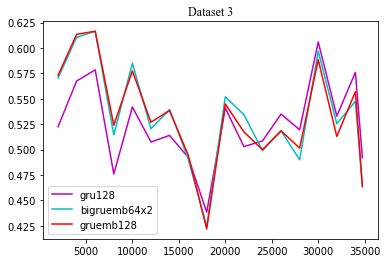

In [149]:
binwidth = 2000
labels=[min(i*binwidth+binwidth, len(dataset)-1) for i in range(int(len(dataset)/binwidth)+1)]

hfont = {'fontname':'Times New Roman'}
plt.title('Dataset 3', **hfont)
# plt.plot(labels, MFUhistory, label="MFU")
# plt.plot(labels, MRUhistory, label="MRU")
# plt.plot(labels, lstm64history, 'b', label="lstm64")
# plt.plot(labels, lstm128history, 'g', label="lstm128")
# plt.plot(labels, gru64history, 'r', label="gru64")
plt.plot(labels, gru128history, 'm', label="gru128")
# plt.plot(labels, bigru64history, 'c', label="bigru64x2")
plt.plot(labels, bigruemb64history, 'c', label="bigruemb64x2")
plt.plot(labels, gruemb128history, 'r', label="gruemb128")
# plt.plot(labels, bigruemb64plushistory, 'y', label="bigruemb+64x2")
plt.legend()
plt.savefig("outputdata/AccuracyOverTime.png")
plt.show()
